In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [54]:
df= pd.read_csv('/content/drive/MyDrive/skripsi/data fix.csv')
df

,Tahun,Brand,Model,EngineSize,Jarak,Transmisi,Harga
0,2012,Toyota,86,2.0,16800.0,Automatic,450000000
1,2012,Toyota,86,2.0,50400.0,Automatic,448000000
2,2013,Toyota,86,2.0,22400.0,Automatic,445000000
3,2013,Toyota,86,2.0,30000.0,Manual,550000000
4,2018,Toyota,86,2.0,16800.0,Automatic,675000000
...,...,...,...,...,...,...,...
4994,2021,Toyota,Yaris,1.5,10000.0,Automatic,248000000
4995,2021,Toyota,Yaris,1.5,5000.0,Automatic,285000000
4996,2021,Toyota,Yaris,1.5,5000.0,Automatic,285000000
4997,2021,Toyota,Yaris,1.5,5000.0,Automatic,275000000


In [55]:
df.shape

(4999, 7)

In [56]:
df.isnull().sum()

Tahun          0
Brand          0
Model          0
EngineSize     0
Jarak         40
Transmisi      0
Harga          0
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tahun       4999 non-null   int64  
 1   Brand       4999 non-null   object 
 2   Model       4999 non-null   object 
 3   EngineSize  4999 non-null   float64
 4   Jarak       4959 non-null   float64
 5   Transmisi   4999 non-null   object 
 6   Harga       4999 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 273.5+ KB


In [58]:
jarak = df['Jarak'].mean()
df['Jarak'] = df['Jarak'].fillna(jarak)
df['Jarak'].isna().sum()

0

In [59]:
df['Jarak']=df['Jarak'].astype(int)
df.head()

,Tahun,Brand,Model,EngineSize,Jarak,Transmisi,Harga
0,2012,Toyota,86,2.0,16800,Automatic,450000000
1,2012,Toyota,86,2.0,50400,Automatic,448000000
2,2013,Toyota,86,2.0,22400,Automatic,445000000
3,2013,Toyota,86,2.0,30000,Manual,550000000
4,2018,Toyota,86,2.0,16800,Automatic,675000000


In [60]:
df.describe()

,Tahun,EngineSize,Jarak,Harga
count,4999.000000,4999.000000,4.999000e+03,4.999000e+03
mean,2016.866573,1.581096,5.604406e+04,2.273497e+08
std,2.409382,0.459414,6.418438e+04,1.796142e+08
min,2010.000000,1.000000,7.000000e+00,4.500000e+02
25%,2016.000000,1.300000,3.000000e+04,1.300000e+08
50%,2017.000000,1.500000,5.100000e+04,1.823000e+08
75%,2019.000000,1.500000,7.614350e+04,2.550000e+08
max,2021.000000,4.600000,3.900000e+06,2.990000e+09


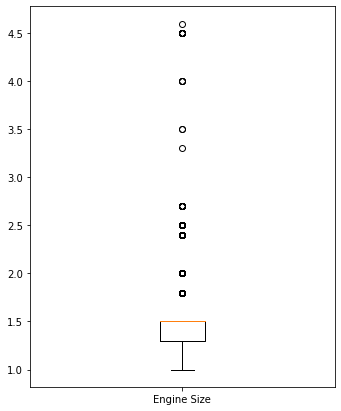

In [61]:
f = plt.figure(figsize=(12,7))
f.add_subplot(1,2,2)
plt.boxplot(df['EngineSize'])
plt.xticks([1], ['Engine Size'])
plt.show()

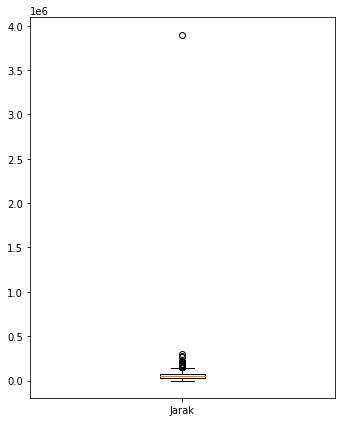

In [62]:
f = plt.figure(figsize=(12,7))
f.add_subplot(1,2,2)
plt.boxplot(df['Jarak'])
plt.xticks([1], ['Jarak'])
plt.show()

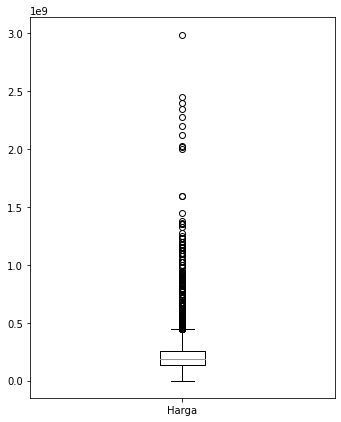

In [63]:
f = plt.figure(figsize=(12,7))
f.add_subplot(1,2,2)
plt.boxplot(df['Harga'])
plt.xticks([1], ['Harga'])
plt.show()

In [64]:
Q1=df['Jarak'].quantile(0.25)
Q3=df['Jarak'].quantile(0.75)
IQR=Q3-Q1
print("Shape lama : ", df.shape)
print("Quartile 1 : ", Q1)
print("Quartile 3 : ", Q3)
print("Nilai IQR : ", IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
df = df[df['Jarak']< Upper_Whisker]
df = df[df['Jarak']> Lower_Whisker]
print("Lower Whisker : ", Lower_Whisker)
print("High Whisker : ", Upper_Whisker)
print("Shape baru : ", df.shape)

Shape lama :  (4999, 7)
Quartile 1 :  30000.0
Quartile 3 :  76143.5
Nilai IQR :  46143.5
Lower Whisker :  -39215.25
High Whisker :  145358.75
Shape baru :  (4925, 7)


In [65]:
Q1=df['EngineSize'].quantile(0.25)
Q3=df['EngineSize'].quantile(0.75)
IQR=Q3-Q1
print("Shape lama : ", df.shape)
print("Quartile 1 : ", Q1)
print("Quartile 3 : ", Q3)
print("Nilai IQR : ", IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
df = df[df['EngineSize']< Upper_Whisker]
df = df[df['EngineSize']> Lower_Whisker]
print("Lower Whisker : ", Lower_Whisker)
print("High Whisker : ", Upper_Whisker)
print("Shape baru : ", df.shape)

Shape lama :  (4925, 7)
Quartile 1 :  1.3
Quartile 3 :  1.5
Nilai IQR :  0.19999999999999996
Lower Whisker :  1.0
High Whisker :  1.7999999999999998
Shape baru :  (3530, 7)


In [66]:
Q1=df['Harga'].quantile(0.25)
Q3=df['Harga'].quantile(0.75)
IQR=Q3-Q1
print("Shape lama : ", df.shape)
print("Quartile 1 : ", Q1)
print("Quartile 3 : ", Q3)
print("Nilai IQR : ", IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
df = df[df['Harga']< Upper_Whisker]
df = df[df['Harga']> Lower_Whisker]
print("Lower Whisker : ", Lower_Whisker)
print("High Whisker : ", Upper_Whisker)
print("Shape baru : ", df.shape)

Shape lama :  (3530, 7)
Quartile 1 :  128500000.0
Quartile 3 :  213400000.0
Nilai IQR :  84900000.0
Lower Whisker :  1150000.0
High Whisker :  340750000.0
Shape baru :  (3305, 7)


In [68]:
from sklearn.preprocessing import LabelEncoder
lem=LabelEncoder()
df['Model']=lem.fit_transform(df['Model'])
print(lem.classes_)
df

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


,Tahun,Brand,Model,EngineSize,Jarak,Transmisi,Harga
87,2017,Toyota,0,1.2,77000,Automatic,105000000
88,2017,Toyota,0,1.2,44873,Manual,112915000
89,2017,Toyota,0,1.2,35588,Automatic,123675000
90,2017,Toyota,0,1.2,14788,Manual,116206000
91,2017,Toyota,0,1.2,40456,Automatic,125600000
...,...,...,...,...,...,...,...
4994,2021,Toyota,25,1.5,10000,Automatic,248000000
4995,2021,Toyota,25,1.5,5000,Automatic,285000000
4996,2021,Toyota,25,1.5,5000,Automatic,285000000
4997,2021,Toyota,25,1.5,5000,Automatic,275000000


In [69]:
lem=LabelEncoder()
df['Transmisi']=lem.fit_transform(df['Transmisi'])
print(lem.classes_)

['Automatic' 'Manual']


In [70]:
lem=LabelEncoder()
df['Brand']=lem.fit_transform(df['Brand'])
print(lem.classes_)
df.head()

['Daihatsu' 'Honda' 'Toyota']


,Tahun,Brand,Model,EngineSize,Jarak,Transmisi,Harga
87,2017,2,0,1.2,77000,0,105000000
88,2017,2,0,1.2,44873,1,112915000
89,2017,2,0,1.2,35588,0,123675000
90,2017,2,0,1.2,14788,1,116206000
91,2017,2,0,1.2,40456,0,125600000


In [71]:
df["Model"] = (df["Model"] - df["Model"].min()) / (df["Model"].max() - df["Model"].min())
df["EngineSize"] = (df["EngineSize"] - df["EngineSize"].min()) / (df["EngineSize"].max() - df["EngineSize"].min())
df["Tahun"] = (df["Tahun"] - df["Tahun"].min()) / (df["Tahun"].max() - df["Tahun"].min())
df["Jarak"] = (df["Jarak"] - df["Jarak"].min()) / (df["Jarak"].max() - df["Jarak"].min())
df["Harga"] = (df["Harga"] - df["Harga"].min()) / (df["Harga"].max() - df["Harga"].min())
df["Brand"] = (df["Brand"] - df["Brand"].min()) / (df["Brand"].max() - df["Brand"].min())
df.head()

,Tahun,Brand,Model,EngineSize,Jarak,Transmisi,Harga
87,0.636364,1.0,0.0,0.0,0.530989,0,0.196552
88,0.636364,1.0,0.0,0.0,0.309402,1,0.223845
89,0.636364,1.0,0.0,0.0,0.245362,0,0.260948
90,0.636364,1.0,0.0,0.0,0.101899,1,0.235193
91,0.636364,1.0,0.0,0.0,0.278937,0,0.267586


In [72]:
df.corr().style.background_gradient().set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,Tahun,Brand,Model,EngineSize,Jarak,Transmisi,Harga
Tahun,1.00,0.10,-0.18,-0.17,-0.61,-0.05,0.41
Brand,0.10,1.00,-0.30,0.12,-0.04,-0.34,0.23
Model,-0.18,-0.30,1.00,0.45,0.12,0.06,0.15
EngineSize,-0.17,0.12,0.45,1.00,0.16,-0.31,0.62
Jarak,-0.61,-0.04,0.12,0.16,1.00,-0.01,-0.27
Transmisi,-0.05,-0.34,0.06,-0.31,-0.01,1.00,-0.45
Harga,0.41,0.23,0.15,0.62,-0.27,-0.45,1.00


In [73]:
x = df.drop(columns=['Harga'])
y = df['Harga']

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.7, random_state = 42)

In [75]:
from sklearn.tree import DecisionTreeRegressor

regressorTree = DecisionTreeRegressor( max_depth=10, min_samples_split = 3)
regressorTree.fit(x_train, y_train)  
y_pred=regressorTree.predict(x_test)
y_pred_train = regressorTree.predict(x_train)

In [76]:
from sklearn.metrics import mean_squared_error, r2_score
mape = np.mean(np.abs((y_test-y_pred)/y_test))*100
print('MAPE:', mape)
print('MSE : {}' .format(mean_squared_error(y_test, y_pred)))
print('R^2 : {0:.3f}'.format(r2_score(y_test, y_pred)))

MAPE: inf
MSE : 0.0036225765926962573
R^2 : 0.880


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



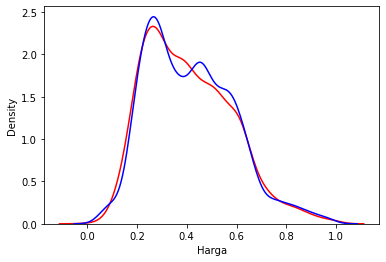

In [77]:
import seaborn as sns
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values" , ax=ax1)

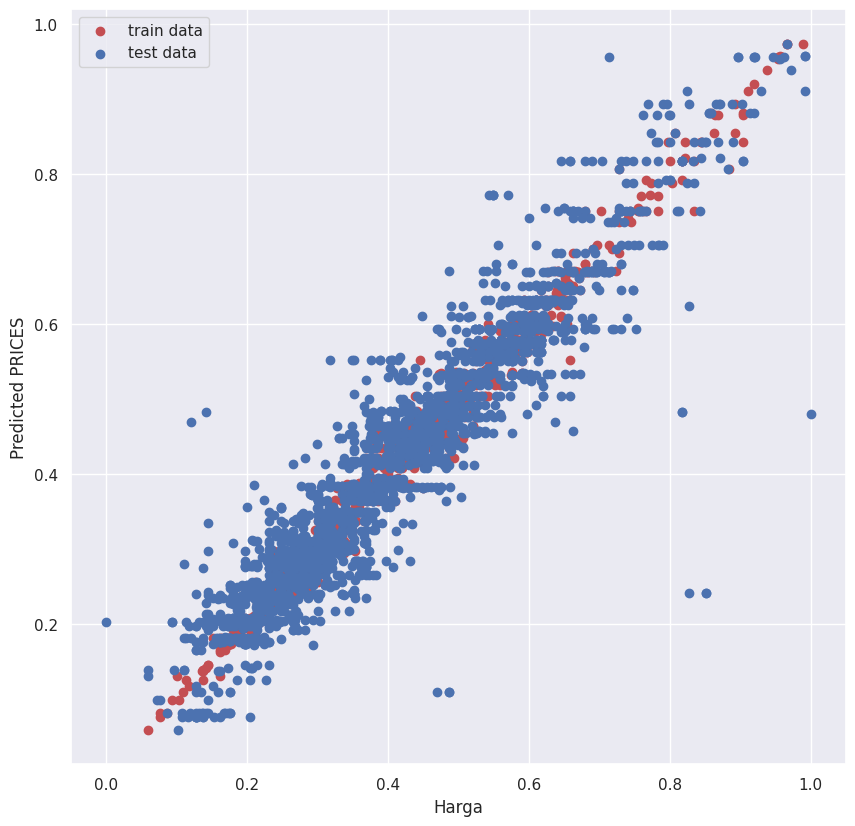

In [78]:
import seaborn as sns

plt.figure(figsize=(10, 10), dpi=100)
sns.set()
plt.xlabel("Harga")
plt.ylabel("Predicted PRICES")
plt.scatter(y_train, y_pred_train, lw=1, color="r", label="train data")
plt.scatter(y_test, y_pred, lw=1, color="b", label="test data")
plt.legend()
plt.show()

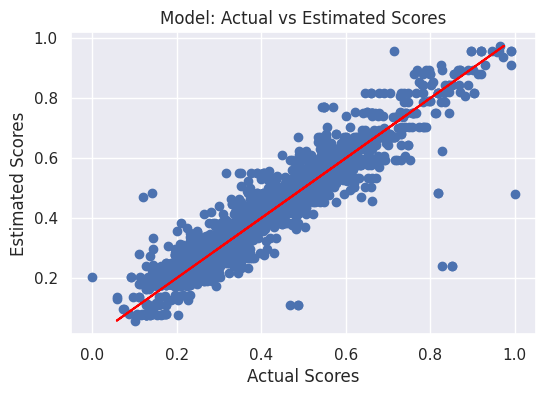

In [79]:
plt.figure(dpi = 100)
plt.scatter(y_test, y_pred)
plt.plot(y_pred, y_pred, color="red")
plt.xlabel("Actual Scores")
plt.ylabel("Estimated Scores")
plt.title("Model: Actual vs Estimated Scores")
plt.show()

In [80]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred=regr.predict(x_test)
y_pred_train = regr.predict(x_train)
print('Nilai Intercept : ', regr.intercept_)
print('Nilai Koefisien : ', pd.DataFrame(regr.coef_))
print('Tingkat Akurasi : ', regr.score(x_test,y_test)*100,'%')

Nilai Intercept :  0.0459704760121864
Nilai Koefisien :            0
0  0.405489
1  0.012885
2 -0.032834
3  0.264176
4 -0.059098
5 -0.075143
Tingkat Akurasi :  72.05647658623838 %


In [81]:
tabel = pd.DataFrame({'data test' : y_test,
         'data predik' : y_pred})
print(tabel.head(5))

      data test  data predik
139    0.294828     0.341534
1067   0.382469     0.360586
1358   0.189655     0.187164
2335   0.203448     0.507221
393    0.362759     0.403836


In [82]:
mape = np.mean(np.abs((y_test-y_pred)/y_test))*100
print('MAPE:', mape)
print('MSE : {}' .format(mean_squared_error(y_test, y_pred)))
print('R^2 : {0:.3f}'.format(r2_score(y_test, y_pred)))

MAPE: inf
MSE : 0.008416642511084236
R^2 : 0.721


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



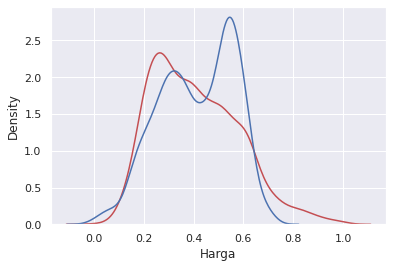

In [83]:
import seaborn as sns

ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_pred, hist=False, color='b', label='Predicted Values' , ax=ax1)

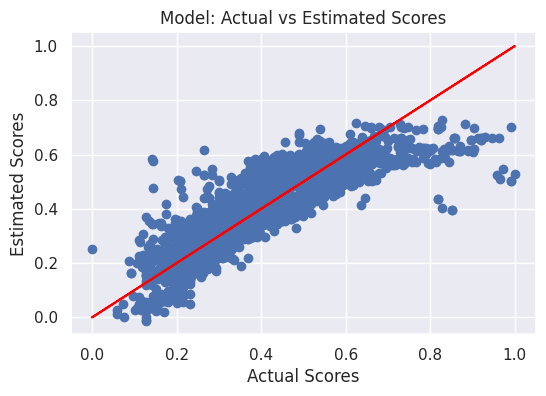

In [84]:
plt.figure(dpi = 100)
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual Scores")
plt.ylabel("Estimated Scores")
plt.title("Model: Actual vs Estimated Scores")
plt.show()

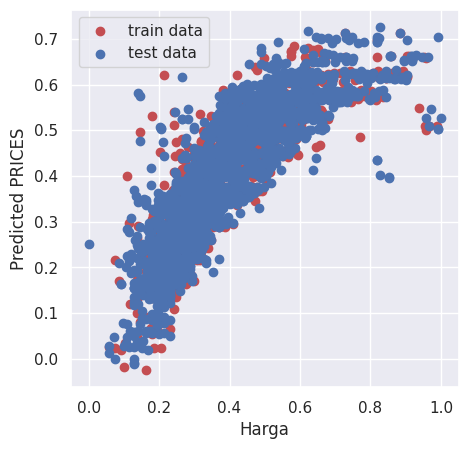

In [85]:
import seaborn as sns

plt.figure(figsize=(5, 5), dpi=100)
sns.set()
plt.xlabel("Harga")
plt.ylabel("Predicted PRICES")
plt.scatter(y_train, y_pred_train, lw=1, color="r", label="train data")
plt.scatter(y_test, y_pred, lw=1, color="b", label="test data")
plt.legend()
plt.show()